## DC Residential Feature Scaling
#### Kiran Pandey May 5, 2019

Re-scale the "price" column from the D.C. Residential Properties dataset (Kaggle) using z-score standardization and Min-max scaling.

source input: https://www.kaggle.com/christophercorrea/dc-residential-properties

ooutput : dataframe wirg alternate z-scores

### Libararies used

In [1]:
import pandas as pd

#preprocessing functions will be used to standardize/normalize data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
# load data
filepath = "../datasets/DC_Properties.csv"
dcp_df = pd.read_csv(filepath)

C:\Users\kdpan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#check if any missing values in the data
print(dcp_df.shape)
print(dcp_df.columns)
print(dcp_df.describe().T)
print(dcp_df.head())

(158957, 49)
Index(['Unnamed: 0', 'BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS',
       'BEDRM', 'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE',
       'QUALIFIED', 'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE',
       'CNDTN', 'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES',
       'USECODE', 'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM',
       'LIVING_GBA', 'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID',
       'LATITUDE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD',
       'CENSUS_TRACT', 'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')
                 count           mean           std           min  \
Unnamed: 0    158957.0   79478.000000  4.588708e+04      0.000000   
BATHRM        158957.0       1.810678  9.763960e-01      0.000000   
HF_BATHRM     158957.0       0.458237  5.875715e-01      0.000000   
NUM_UNITS     106696.0       1.198039  5.969244e-01      0.000000   
ROOMS    

In [4]:
sel_col = ['PRICE', 'BEDRM', 'BATHRM', 'LIVING_GBA', 'LANDAREA', 'FIREPLACES', 'KITCHENS', 'USECODE']
sel_col1 = ['PRICE1', 'BEDRM1', 'BATHRM1', 'LIVING_GBA1', 'LANDAREA1', 'FIREPLACES1', 'KITCHENS1', 'USECODE1']
sel_col2 = ['PRICE2', 'BEDRM2', 'BATHRM2', 'LIVING_GBA2', 'LANDAREA2', 'FIREPLACES2', 'KITCHENS2', 'USECODE2']
sel_col3 = ['PRICE3', 'BEDRM3', 'BATHRM3', 'LIVING_GBA3', 'LANDAREA3', 'FIREPLACES3', 'KITCHENS3', 'USECODE3']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C17E403668>,
      dtype=object)

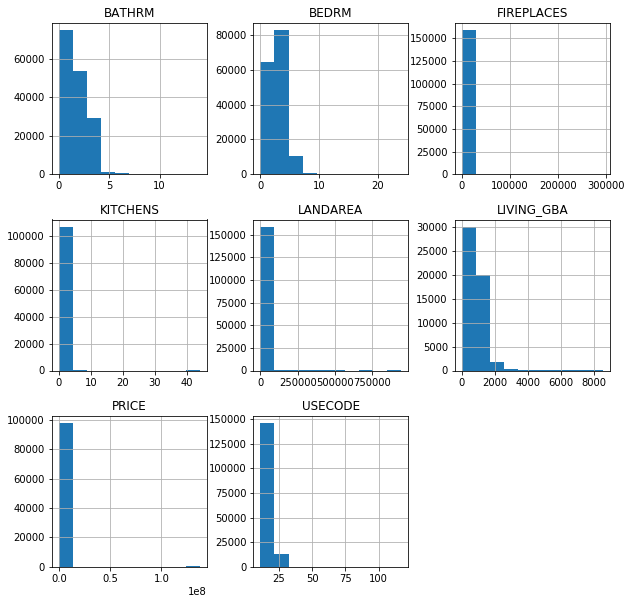

In [5]:
# frequency count for each column
dcp_df[sel_col].hist(figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C173A943C8>,
      dtype=object)

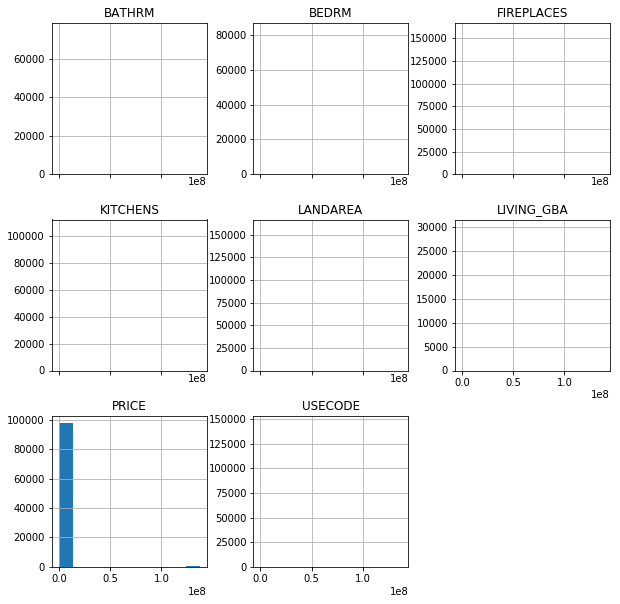

In [6]:
# frequency count of each colu, using a uniform scale 
dcp_df[sel_col].hist(figsize=(10,10), sharex=True)

### Method 1: Scaling manually -- Z-score Standardization

Z-score standardization is the process of converting the data to have a mean of 0 and a standard deviation of 1. The z-score is calculcated by subtracting the mean for a feature (column) by each data point value and dividing by the standard deviation.
### \begin{align}  z = \frac{(value - mean)}{std dev} \end{align}

In [7]:
dcp_df[sel_col].describe()

,PRICE,BEDRM,BATHRM,LIVING_GBA,LANDAREA,FIREPLACES,KITCHENS,USECODE
count,9.821600e+04,158957.000000,158957.000000,52261.000000,158957.000000,158957.000000,106695.000000,158957.000000
mean,9.313516e+05,2.732506,1.810678,888.834542,2473.282158,2.374674,1.219251,14.252999
std,7.061325e+06,1.358864,0.976396,420.185822,5059.046023,737.295595,0.621170,3.725736
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000
25%,2.400000e+05,2.000000,1.000000,616.000000,697.000000,0.000000,1.000000,11.000000
50%,3.999990e+05,3.000000,2.000000,783.000000,1649.000000,0.000000,1.000000,13.000000
75%,6.520000e+05,3.000000,2.000000,1060.000000,3000.000000,1.000000,1.000000,17.000000
max,1.374275e+08,24.000000,14.000000,8553.000000,942632.000000,293920.000000,44.000000,117.000000


In [8]:
#Method 1: manual (vectorized) calculation of z-scores for selected columns column
mean1 = dcp_df[sel_col].mean()
std1 = dcp_df[sel_col].std()
dcp_df[sel_col1] = (dcp_df[sel_col] - mean1)/std1

In [9]:
#values for mean and standard deviation of selected columns
print ('mean1: \n', mean1, 'std1: \n', std1)

mean1: 
 PRICE         931351.594934
BEDRM              2.732506
BATHRM             1.810678
LIVING_GBA       888.834542
LANDAREA        2473.282158
FIREPLACES         2.374674
KITCHENS           1.219251
USECODE           14.252999
dtype: float64 std1: 
 PRICE         7.061325e+06
BEDRM         1.358864e+00
BATHRM        9.763960e-01
LIVING_GBA    4.201858e+02
LANDAREA      5.059046e+03
FIREPLACES    7.372956e+02
KITCHENS      6.211696e-01
USECODE       3.725736e+00
dtype: float64


In [10]:
sel_col.extend(sel_col1)

In [11]:
sel_col.sort()
sel_col

['BATHRM',
 'BATHRM1',
 'BEDRM',
 'BEDRM1',
 'FIREPLACES',
 'FIREPLACES1',
 'KITCHENS',
 'KITCHENS1',
 'LANDAREA',
 'LANDAREA1',
 'LIVING_GBA',
 'LIVING_GBA1',
 'PRICE',
 'PRICE1',
 'USECODE',
 'USECODE1']

In [12]:
dcp_df[sel_col].describe().T

,count,mean,std,min,25%,50%,75%,max
BATHRM,158957.0,1.810678e+00,9.763960e-01,0.000000,1.000000,2.000000,2.000000,1.400000e+01
BATHRM1,158957.0,-2.530007e-13,1.000000e+00,-1.854451,-0.830276,0.193898,0.193898,1.248399e+01
BEDRM,158957.0,2.732506e+00,1.358864e+00,0.000000,2.000000,3.000000,3.000000,2.400000e+01
BEDRM1,158957.0,5.054997e-13,1.000000e+00,-2.010875,-0.539058,0.196851,0.196851,1.565093e+01
FIREPLACES,158957.0,2.374674e+00,7.372956e+02,0.000000,0.000000,0.000000,1.000000,2.939200e+05
FIREPLACES1,158957.0,-3.217374e-16,1.000000e+00,-0.003221,-0.003221,-0.003221,-0.001864,3.986429e+02
KITCHENS,106695.0,1.219251e+00,6.211696e-01,0.000000,1.000000,1.000000,1.000000,4.400000e+01
KITCHENS1,106695.0,-2.837164e-14,1.000000e+00,-1.962831,-0.352965,-0.352965,-0.352965,6.887129e+01
LANDAREA,158957.0,2.473282e+03,5.059046e+03,0.000000,697.000000,1649.000000,3000.000000,9.426320e+05
LANDAREA1,158957.0,3.279473e-16,1.000000e+00,-0.488883,-0.351110,-0.162932,0.104114,1.858372e+02


In [13]:
dcp_df.shape

(158957, 57)

In [14]:
dcp_df.dropna(subset=['PRICE','PRICE1'],inplace=True)
dcp_df.shape

(98216, 57)

In [15]:
dcp_df[sel_col].dtypes

BATHRM           int64
BATHRM1        float64
BEDRM            int64
BEDRM1         float64
FIREPLACES       int64
FIREPLACES1    float64
KITCHENS       float64
KITCHENS1      float64
LANDAREA         int64
LANDAREA1      float64
LIVING_GBA     float64
LIVING_GBA1    float64
PRICE          float64
PRICE1         float64
USECODE          int64
USECODE1       float64
dtype: object

C:\Users\kdpan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kdpan\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C174B02B38>,
      dtype=object)

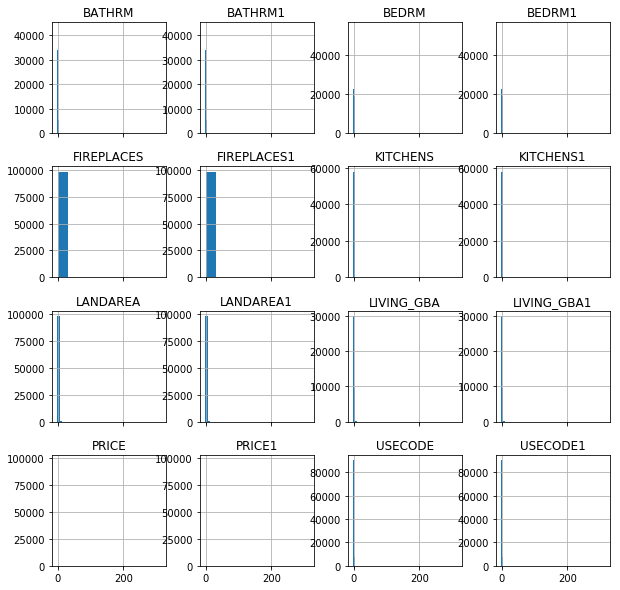

In [16]:
#Method 2: use scikit-learn to calculate z-scores

#set StandardScale function to a variable (easier to type)
#scaler will use z-score formula on the column
scaler = StandardScaler()

#calculate z-scores for selected columns
#fit_transform calculates the mean and std, and replaces any missing values w/ mean if needed

dcp_zscore = pd.DataFrame(scaler.fit_transform(dcp_df[sel_col]), columns = sel_col)

#plot frequency distribution with same scale range
dcp_zscore.hist(figsize=(10,10), sharex=True)

In [17]:
#mean and standard deviation of z-score standardized column
dcp_zscore.mean(), dcp_zscore.std()

(BATHRM        -9.223575e-14
 BATHRM1       -9.223553e-14
 BEDRM          2.728305e-13
 BEDRM1         2.728305e-13
 FIREPLACES    -1.150015e-15
 FIREPLACES1   -1.150592e-15
 KITCHENS       6.913584e-15
 KITCHENS1      6.913768e-15
 LANDAREA       7.968969e-15
 LANDAREA1      7.968971e-15
 LIVING_GBA    -4.689175e-17
 LIVING_GBA1   -8.204679e-17
 PRICE          3.048712e-16
 PRICE1         2.760754e-16
 USECODE        8.588517e-14
 USECODE1       8.588516e-14
 dtype: float64, BATHRM         1.000005
 BATHRM1        1.000005
 BEDRM          1.000005
 BEDRM1         1.000005
 FIREPLACES     1.000005
 FIREPLACES1    1.000005
 KITCHENS       1.000009
 KITCHENS1      1.000009
 LANDAREA       1.000005
 LANDAREA1      1.000005
 LIVING_GBA     1.000012
 LIVING_GBA1    1.000012
 PRICE          1.000005
 PRICE1         1.000005
 USECODE        1.000005
 USECODE1       1.000005
 dtype: float64)

In [18]:
dcp_zscore.head()

,BATHRM,BATHRM1,BEDRM,BEDRM1,FIREPLACES,FIREPLACES1,KITCHENS,KITCHENS1,LANDAREA,LANDAREA1,LIVING_GBA,LIVING_GBA1,PRICE,PRICE1,USECODE,USECODE1
0,2.188294,2.188294,0.999804,0.999804,0.001576,0.001576,1.132723,1.132723,-0.146197,-0.146197,NaN,NaN,0.023175,0.023175,2.548333,2.548333
1,1.166129,1.166129,1.717270,1.717270,0.000510,0.000510,1.132723,1.132723,-0.146197,-0.146197,NaN,NaN,0.165501,0.165501,2.548333,2.548333
2,1.166129,1.166129,1.717270,1.717270,-0.000556,-0.000556,1.132723,1.132723,-0.146197,-0.146197,NaN,NaN,0.094975,0.094975,2.548333,2.548333
3,1.166129,1.166129,1.717270,1.717270,0.000510,0.000510,-0.379394,-0.379394,0.040393,0.040393,NaN,NaN,0.144258,0.144258,-0.980986,-0.980986
4,1.166129,1.166129,0.999804,0.999804,-0.002689,-0.002689,1.132723,1.132723,-0.165363,-0.165363,NaN,NaN,0.016803,0.016803,2.548333,2.548333


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C17E40F2E8>,
      dtype=object)

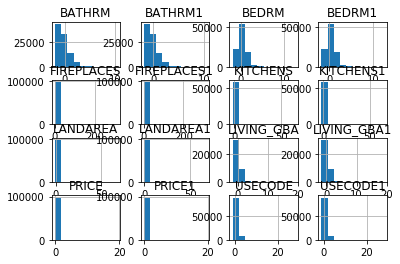

In [21]:
#AFTER: frequency count plot of column (z-score standardization)
#range is much smaller
dcp_zscore.hist()

### Min-max Scaling
Max-min scaling transforms the data into a range from 0 to 1. The new minimum value of the column will always be 0 and the new maximum value of the column will always be 1. The values in between are calculated by using the original value and subtracting the column's minimum value, then dividing by the maximum value of the column minus the minimum value.

### \begin{align}  m = \frac{(value - min)}{max - min} \end{align}

In [22]:
#MinMaxScaler function will calculate the formula
minmax_sc = MinMaxScaler()

In [23]:
#use MinMaxScaler function and fit_transform function on the column
dcp_minmax = minmax_sc.fit_transform(dcp_df[['PRICE']])

In [24]:
#mean and standard deviation of Min-Max column
dcp_minmax.mean(), dcp_minmax.std()

(0.006777030046710401, 0.0513819049810315)

In [25]:
#convert array into a dataframe column
#look at first 5 rows of min-max values
dcp_mm_col = pd.Series(dcp_minmax.reshape(-1))
dcp_mm_col.head()

0    0.007968
1    0.015281
2    0.011657
3    0.014189
4    0.007640
dtype: float64

In [26]:
#verify the range is between 0 and 1
dcp_mm_col.min(), dcp_mm_col.max()

(0.0, 0.9999999999999999)

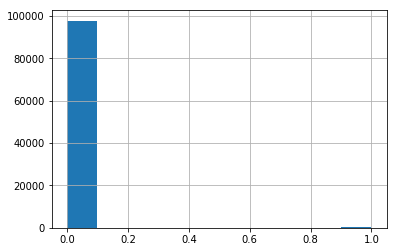

In [27]:
dcp_mm_col.hist()

C:\Users\kdpan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C100A030F0>,
      dtype=object)

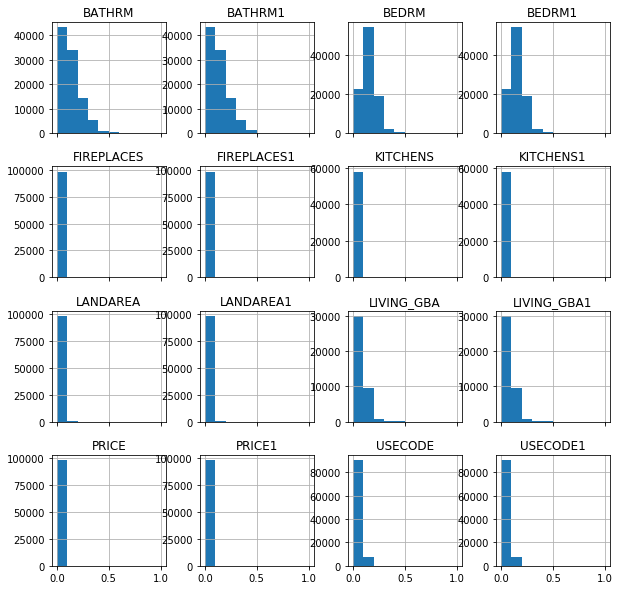

In [28]:
#show min-max scaling for all columns

#calculate z-scores
minmax_df = pd.DataFrame(minmax_sc.fit_transform(dcp_df[sel_col]), columns = sel_col)

#plot frequency distribution with same scale range
minmax_df.hist(figsize=(10,10), sharex=True)

### Tips for Predictive Models

- Z-score standardization is most useful for regression models, such as linear regression and logistic regression
- Min-Max scaling is more relevant for algorithms that calculate distances between data points, such as K-Nearest Neighbors and K-Means Clustering